In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import csv
warnings.filterwarnings('ignore')
import zipfile
from datetime import datetime
import os

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
directory = r'D:\RECONCILIATIONS\PAIEMENT\OM BF\Données OP\AOUT'

# Trouver le fichier CSV le plus récent dans le répertoire
def get_latest_file(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Charger le fichier CSV le plus récent
latest_file_path = get_latest_file(directory)
op = pd.read_csv(latest_file_path,sep=';')
op.sample()



directory = r'D:\RECONCILIATIONS\PAIEMENT\OM BF\Données PMT\AOUT'

# Trouver le fichier CSV le plus récent dans le répertoire
def get_latest_file(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Charger le fichier CSV le plus récent
latest_file_path = get_latest_file(directory)
pmt = pd.read_csv(latest_file_path)
pmt.sample()

,created_at,payment_date,operator,merchant_name,transaction_id,merchant_transaction_id,id_operator,external_transaction_id,phone_number,client_email,amount,fee_amount,merchant_amount,operation_origin,currency,statut,country,provider_id,provider_name
9362,2024-08-29 02:09:06,2024-08-29 02:09:27,OM_BF,1XBET BF,6e54202dcc754cb2803c30c9eebc7644,12434245149,OM240829.0209.10330539,NaN,22665417478,antoenewendeouedraogo@gmail.com,1300.00,78.00,1222.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin


In [4]:
#op = pd.read_csv(r'D:\RECONCILIATIONS\PAIEMENT\OM BF\Données OP\JULY\20240717_OMBF_PAYIN_20240716.csv')

In [5]:
#pmt = pd.read_csv(r'D:\RECONCILIATIONS\PAIEMENT\OM BF\Données PMT\JUILLET\E20240717_OMBF_PAYIN_PMT_20240716.csv')

In [6]:
#SAUVEGARDER UNE COPIE DE LA DATAFRAME
op1=op.copy()
pmt1=pmt.copy()

In [7]:
pmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85524 entries, 0 to 85523
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at               85524 non-null  object 
 1   payment_date             68644 non-null  object 
 2   operator                 85524 non-null  object 
 3   merchant_name            85524 non-null  object 
 4   transaction_id           85524 non-null  object 
 5   merchant_transaction_id  85524 non-null  object 
 6   id_operator              75229 non-null  object 
 7   external_transaction_id  0 non-null      float64
 8   phone_number             85524 non-null  int64  
 9   client_email             85524 non-null  object 
 10  amount                   85524 non-null  float64
 11  fee_amount               85524 non-null  float64
 12  merchant_amount          85524 non-null  float64
 13  operation_origin         85524 non-null  object 
 14  currency              

TRAITEMNETS

In [8]:
dfpmt = pmt.rename(columns={
        'created_at': 'Created Date',
        'payment_date': 'Payment Date',
        'operator': 'Operator',
        'merchant_name': 'Merchant Name',
        'transaction_id': 'Transaction ID',
        'id_operator': 'ID Opérateur',
        'phone_number': 'Phone Number',
        'amount': 'Montant',
        'fee_amount': 'Fee amount',
        'merchant_amount': 'Merchant amount',
        'statut': 'Statut'
    })

In [9]:
dfpmt

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,Montant,Fee amount,Merchant amount,operation_origin,currency,Statut,country,provider_id,provider_name
0,2024-08-28 20:04:15,2024-08-28 20:05:07,OM_BF,1XBET BF,e543ee76d86c499ab8ef7ecabe9945cf,12431624829,OM240828.2005.86746471,NaN,22666698606,zebazakaria54@gmail.com,600.00,36.00,564.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
1,2024-08-28 20:03:45,2024-08-28 20:05:08,OM_BF,1XBET BF,f7ee3b8f715c46b3abf6bf36f1866b31,12431618517,OM240828.2005.68107175,NaN,22676988360,ulrich.ousmane5@gmail.com,1000.00,60.00,940.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
2,2024-08-28 20:04:48,2024-08-28 20:05:09,OM_BF,Bet Winner BF,61fe8401a540432089fde232d351a856,133150307,OM240828.2005.10351304,NaN,22677604496,amidoutraore72432847@gmail.com,10000.00,700.00,9300.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
3,2024-08-28 20:04:31,2024-08-28 20:05:09,OM_BF,Mel Bet BF,be70dcba0d254915b4bdf71df5f79cad,12431628253,OM240828.2005.10351305,NaN,22676417189,sawadogoblaise10@gmail.com,1000.00,60.00,940.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
4,2024-08-28 20:04:27,2024-08-28 20:05:13,OM_BF,Mel Bet BF,f7fa4d2a077045e7826cd3b12bd20088,12431627431,OM240828.2005.42117138,NaN,22677506452,sayoubabado384@gmail.com,580.00,34.80,545.20,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85519,2024-08-28 20:04:29,2024-08-28 20:04:45,OM_BF,Mel Bet BF,45beea5b6fa0494d8f1235421a85262f,12431627775,OM240828.2004.60731458,NaN,22674910140,Illiadama74@gmail.com,500.00,30.00,470.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
85520,2024-08-28 20:04:03,2024-08-28 20:05:01,OM_BF,1XBET BF,7e97c187618141e8bee04d0e1563e214,12431622107,OM240828.2005.60731796,NaN,22656216224,kasimirew@gmail.com,500.00,30.00,470.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin
85521,2024-08-28 20:03:42,NaN,OM_BF,Mel Bet BF,9619fd6ce72d4368b4c461feb9e1f6e9,12431618039,6854f342-1d84-4959-b,NaN,22674882411,anansigansagne@gmail.com,500.00,30.00,470.00,payment,XOF,FAILED,BF,NaN,OMBF_Payin
85522,2024-08-28 20:04:11,2024-08-28 20:05:04,OM_BF,Bet Winner BF,2d49842543f545ec9cb1831c0d7ace6e,133150162,OM240828.2005.45341604,NaN,22676815535,traorechaima501@gmail.com,5000.00,350.00,4650.00,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin


In [10]:
op

,TRANSFER_DATE,TRANSFER_STATUS,TRANSFER_ID,ORDER_ID,MSISDN,REFERENCE_NUMBER,STATEMENT,TRANSFER_AMOUNT,CREDIT,DEBIT,FEES,PREVIOUS_BAL,AFTER_BAL,REMARKS,FTXN_ID
0,28/08/2024,TS,OM240828.0753.71349509,NaN,54474492,bfd87946-92c4-48b7-bd1e-77d477f7b56a,54474492 Money Received from 74436670,1000,1000,NaN,NaN,10529003,10530003,OTP Cashout,05ae9352261341e19923649a949b6a32
1,28/08/2024,TS,OM240828.0753.10369101,NaN,54474492,8b63ebbc-155e-4e54-b002-d818c10df1ec,54474492 Money Received from 06051773,1000,1000,NaN,NaN,11620326,11621326,OTP Cashout,2b5f24c02c9844b0a9082fd6f9cbf6ac
2,28/08/2024,TS,OM240828.0755.60706256,NaN,54474492,228d3238-f3d9-4fa3-90c9-9084320038a8,54474492 Money Received from 06919529,5800,5800,NaN,NaN,12900172,12905972,OTP Cashout,2ad499817c7e4ab491cc529723890d48
3,28/08/2024,TS,OM240828.0757.42173554,NaN,54474492,75a08f83-cae1-49e2-960f-30640376af59,54474492 Money Received from 74911521,1000,1000,NaN,NaN,13081354,13082354,OTP Cashout,9714887eaf1f493e90ef4bbe9644a4d7
4,28/08/2024,TS,OM240828.0758.19389550,NaN,54474492,c988be24-75a3-45ec-b933-42a4dd645d22,54474492 Money Received from 77355556,500,500,NaN,NaN,13184374,13184874,OTP Cashout,24db4b906d014993b49d440b57aa9126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32455,28/08/2024,TS,OM240828.2359.19396780,NaN,54474492,40e6d789-1785-40ec-9e01-fa92d7df5d9e,54474492 Money Received from 76559758,5000,5000,NaN,NaN,12489239,12494239,OTP Cashout,6f90a7d5a8b74bccabc98192ab00bb66
32456,28/08/2024,TS,OM240828.2359.45321334,NaN,54474492,e2b554de-1479-4241-b87e-7bb2be737bca,54474492 Money Received from 67595896,3000,3000,NaN,NaN,11335585,11338585,OTP Cashout,2ec44c095a1141a08085c4e4958974bb
32457,28/08/2024,TS,OM240828.2359.45321361,NaN,54474492,a333f843-b04b-40a2-972d-e5959f8ccba3,54474492 Money Received from 54024436,200,200,NaN,NaN,11547373,11547573,OTP Cashout,5cb7055512144f5a8f10244abfb8b6cc
32458,28/08/2024,TS,OM240828.2359.71316490,NaN,54474492,e681b112-a42a-4acb-97e6-c1202c3cedf5,54474492 Money Received from 65281213,40000,40000,NaN,NaN,9917484,9957484,OTP Cashout,b81ced0efb7643a18087ae04e776b7b3


In [11]:
dfop=op[['TRANSFER_DATE',
            'TRANSFER_STATUS',
            'TRANSFER_ID',
           'STATEMENT',
           'TRANSFER_AMOUNT',
           'CREDIT',
            'DEBIT',
           'FTXN_ID',
           'PREVIOUS_BAL',
           'AFTER_BAL',
           'REMARKS'
]]

In [12]:
dfop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32460 entries, 0 to 32459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRANSFER_DATE    32460 non-null  object 
 1   TRANSFER_STATUS  32460 non-null  object 
 2   TRANSFER_ID      32460 non-null  object 
 3   STATEMENT        32460 non-null  object 
 4   TRANSFER_AMOUNT  32460 non-null  int64  
 5   CREDIT           32460 non-null  int64  
 6   DEBIT            0 non-null      float64
 7   FTXN_ID          32460 non-null  object 
 8   PREVIOUS_BAL     32460 non-null  int64  
 9   AFTER_BAL        32460 non-null  int64  
 10  REMARKS          32460 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.7+ MB


In [13]:
ts= dfop.loc[(dfop['TRANSFER_STATUS'] == 'TS')]

In [14]:
result = ts.groupby('TRANSFER_DATE').agg(
    Count=('TRANSFER_DATE', 'size'),
    Total_Amount=('CREDIT', 'sum')
).reset_index()

result = result.sort_values(by='Total_Amount', ascending=False)
result

,TRANSFER_DATE,Count,Total_Amount
0,28/08/2024,32460,93021045


CALCUL DE SOLDE

In [15]:
#dfop['Date'] = pd.to_datetime(dfop['DAYOF'],format='%Y%m%d')

In [16]:
#CONVERTIR LA DATE EN DATETIME

#EXTRAITRE LA DATE DANS UNE NOUVELLE COLLONNE
dfpmt['DateCourte'] = dfpmt['Created Date'].apply(lambda x: x.split(' ')[0])

In [17]:
dfop['FTXN_ID'].isnull().sum()

0

In [18]:
dfpmt['Transaction ID'].isnull().sum()

0

In [19]:
dfop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32460 entries, 0 to 32459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRANSFER_DATE    32460 non-null  object 
 1   TRANSFER_STATUS  32460 non-null  object 
 2   TRANSFER_ID      32460 non-null  object 
 3   STATEMENT        32460 non-null  object 
 4   TRANSFER_AMOUNT  32460 non-null  int64  
 5   CREDIT           32460 non-null  int64  
 6   DEBIT            0 non-null      float64
 7   FTXN_ID          32460 non-null  object 
 8   PREVIOUS_BAL     32460 non-null  int64  
 9   AFTER_BAL        32460 non-null  int64  
 10  REMARKS          32460 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.7+ MB


In [20]:
"""
#MISE EN PLACE DE RECHERCHE X POUR RECUPERATION CHEZ L'OP
        # Vérification des correspondances entre A1 et B1
correspondance_statut_op= dfop.set_index('FTXN_ID')['TRANSFER_STATUS']
correspondance_date_op = dfop.set_index('FTXN_ID')['DAYOF'].astype(object)
correspondance_idoperator = dfop.set_index('FTXN_ID')['TRANSFER_ID']


dfpmt['DATEOP'] = dfpmt['Transaction ID'].map(correspondance_date_op)
dfpmt['STATUTOP'] = dfpmt['Transaction ID'].map(correspondance_statut_op)
dfpmt['IDOPERATOR'] = dfpmt['Transaction ID'].map(correspondance_idoperator)
"""

"\n#MISE EN PLACE DE RECHERCHE X POUR RECUPERATION CHEZ L'OP\n        # Vérification des correspondances entre A1 et B1\ncorrespondance_statut_op= dfop.set_index('FTXN_ID')['TRANSFER_STATUS']\ncorrespondance_date_op = dfop.set_index('FTXN_ID')['DAYOF'].astype(object)\ncorrespondance_idoperator = dfop.set_index('FTXN_ID')['TRANSFER_ID']\n\n\ndfpmt['DATEOP'] = dfpmt['Transaction ID'].map(correspondance_date_op)\ndfpmt['STATUTOP'] = dfpmt['Transaction ID'].map(correspondance_statut_op)\ndfpmt['IDOPERATOR'] = dfpmt['Transaction ID'].map(correspondance_idoperator)\n"

In [21]:
# Supprimer les doublons en conservant la première occurrence
dfop_unique = dfop.drop_duplicates(subset='FTXN_ID')

# Vérification des correspondances entre A1 et B1
correspondance_statut_op = dfop_unique.set_index('FTXN_ID')['TRANSFER_STATUS']
correspondance_date_op = dfop_unique.set_index('FTXN_ID')['TRANSFER_DATE'].astype(object)
correspondance_idoperator = dfop_unique.set_index('FTXN_ID')['TRANSFER_ID']

# Utilisation de map pour ajouter les colonnes correspondantes à dfpmt
dfpmt['DATEOP'] = dfpmt['Transaction ID'].map(correspondance_date_op)
dfpmt['STATUTOP'] = dfpmt['Transaction ID'].map(correspondance_statut_op)
dfpmt['IDOPERATOR'] = dfpmt['Transaction ID'].map(correspondance_idoperator)

In [22]:
dfpmt.sample(3)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,operation_origin,currency,Statut,country,provider_id,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR
14053,2024-08-29 09:24:48,2024-08-29 09:25:48,OM_BF,1XBET BF,98e2e60b0aef4f358759a0f90f872f5c,12436270305,OM240829.0925.42125501,NaN,22674439190,inikiema221@gmail.com,...,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin,2024-08-29,NaN,NaN,NaN
41254,2024-08-27 18:58:30,2024-08-27 18:59:24,OM_BF,Bet Winner BF,3876d24a12294a84bd6bdaf5d8f469fe,132834262,OM240827.1859.42114439,NaN,22655777061,koussetieo@gmail.com,...,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin,2024-08-27,NaN,NaN,NaN
20971,2024-08-27 09:34:06,2024-08-27 09:34:58,OM_BF,1XBET BF,8d4a3b2c53d541e2a984a146b4d67b79,12410987395,OM240827.0934.97326431,NaN,22654754019,nouhoulengani@gmail.com,...,payment,XOF,SUCCESS,BF,NaN,OMBF_Payin,2024-08-27,NaN,NaN,NaN


CALCULE DE TAUX ET FAIS

In [23]:
dfpmt['Fraisop'] = dfpmt['Montant'] * 0.0236

In [24]:
dfpmt['FraisPmt'] = dfpmt['Fee amount'] - dfpmt['Fraisop']

In [25]:
dfpmt['Tauxop']=dfpmt['Fraisop'] / dfpmt['Montant']

In [26]:
dfpmt

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,country,provider_id,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop
0,2024-08-28 20:04:15,2024-08-28 20:05:07,OM_BF,1XBET BF,e543ee76d86c499ab8ef7ecabe9945cf,12431624829,OM240828.2005.86746471,NaN,22666698606,zebazakaria54@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.86746471,14.16,21.84,0.02
1,2024-08-28 20:03:45,2024-08-28 20:05:08,OM_BF,1XBET BF,f7ee3b8f715c46b3abf6bf36f1866b31,12431618517,OM240828.2005.68107175,NaN,22676988360,ulrich.ousmane5@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.68107175,23.60,36.40,0.02
2,2024-08-28 20:04:48,2024-08-28 20:05:09,OM_BF,Bet Winner BF,61fe8401a540432089fde232d351a856,133150307,OM240828.2005.10351304,NaN,22677604496,amidoutraore72432847@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.10351304,236.00,464.00,0.02
3,2024-08-28 20:04:31,2024-08-28 20:05:09,OM_BF,Mel Bet BF,be70dcba0d254915b4bdf71df5f79cad,12431628253,OM240828.2005.10351305,NaN,22676417189,sawadogoblaise10@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.10351305,23.60,36.40,0.02
4,2024-08-28 20:04:27,2024-08-28 20:05:13,OM_BF,Mel Bet BF,f7fa4d2a077045e7826cd3b12bd20088,12431627431,OM240828.2005.42117138,NaN,22677506452,sayoubabado384@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.42117138,13.69,21.11,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85519,2024-08-28 20:04:29,2024-08-28 20:04:45,OM_BF,Mel Bet BF,45beea5b6fa0494d8f1235421a85262f,12431627775,OM240828.2004.60731458,NaN,22674910140,Illiadama74@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2004.60731458,11.80,18.20,0.02
85520,2024-08-28 20:04:03,2024-08-28 20:05:01,OM_BF,1XBET BF,7e97c187618141e8bee04d0e1563e214,12431622107,OM240828.2005.60731796,NaN,22656216224,kasimirew@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.60731796,11.80,18.20,0.02
85521,2024-08-28 20:03:42,NaN,OM_BF,Mel Bet BF,9619fd6ce72d4368b4c461feb9e1f6e9,12431618039,6854f342-1d84-4959-b,NaN,22674882411,anansigansagne@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,NaN,NaN,NaN,11.80,18.20,0.02
85522,2024-08-28 20:04:11,2024-08-28 20:05:04,OM_BF,Bet Winner BF,2d49842543f545ec9cb1831c0d7ace6e,133150162,OM240828.2005.45341604,NaN,22676815535,traorechaima501@gmail.com,...,BF,NaN,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.2005.45341604,118.00,232.00,0.02


NBSI

In [27]:
ombf= dfop.loc[(dfop['TRANSFER_STATUS'] == 'TS')]

In [28]:
#NBSI PMT &OMBF
dfpmt['OMBF'] = dfpmt['Transaction ID'].isin(ombf['FTXN_ID']).astype(int)
ombf['PMT'] = ombf['FTXN_ID'].isin(dfpmt['Transaction ID']).astype(int)

In [29]:
dfpmt['Nombre']= dfpmt['Montant']
ombf['Nombre']= ombf['CREDIT']

TCD TABLEAU CROISE DYNAMIQUE

In [30]:
df_filteredpmt = dfpmt[dfpmt['OMBF'] == 1]

# Création du tableau croisé dynamique
tcdpmt = pd.pivot_table(
    df_filteredpmt,
    values=['Montant', 'Nombre','Fraisop', 'FraisPmt'],
    index=['DATEOP','Statut'],
    aggfunc={'Nombre': 'count','Montant': 'sum' ,'Fraisop': 'sum', 'FraisPmt': 'sum' },
    fill_value=0,
    margins=True,
    margins_name='Total'
)

df_filtered = ombf[(ombf['PMT'] == 1) | (ombf['PMT'] == 0)]

# Création du tableau croisé dynamique
tcdombf = pd.pivot_table(
    df_filtered,
    values=['Nombre', 'CREDIT'],
    index=['TRANSFER_DATE','TRANSFER_STATUS'],
    aggfunc={'Nombre': 'count','CREDIT': 'sum' },
    fill_value=0,
    margins=True,
    margins_name='Total'
)

In [31]:
tcdpmt

FraisPmt    Fraisop     Montant  Nombre
DATEOP     Statut                                           
28/08/2024 FAILED       25.48      16.52      700.00       1
           SUCCESS 3723193.56 2195280.14 93020345.00   32459
Total              3723219.04 2195296.66 93021045.00   32460

In [32]:
tcdombf

,,CREDIT,Nombre
TRANSFER_DATE,TRANSFER_STATUS,,
28/08/2024,TS,93021045,32460
Total,,93021045,32460


In [33]:
maj_failed_a_succes = dfpmt.loc[(dfpmt['Statut'] == 'FAILED') & (dfpmt['OMBF'] == 1)]
maj_pending_a_succes = dfpmt.loc[(dfpmt['Statut'] == 'PENDING') & (dfpmt['OMBF'] == 1)]
pending_a_succes = dfpmt.loc[(dfpmt['Statut'] == 'Processing will begin shortly') & (dfpmt['OMBF'] == 1)]

In [34]:
maj_pending_a_succes

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop,OMBF,Nombre


In [35]:
pending_a_succes

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop,OMBF,Nombre


In [36]:
maj_failed_a_succes

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop,OMBF,Nombre
66356,2024-08-28 12:10:41,NaN,OM_BF,1XBET BF,5fc04f41ad734fd5b81ef5846a07d46e,12425649265,NaN,NaN,22676022144,sisbsyaogo88@gmail.com,...,OMBF_Payin,2024-08-28,28/08/2024,TS,OM240828.1210.45379443,16.52,25.48,0.02,1,700.00


In [37]:
trx_pending_abs_ombf = dfpmt.loc[(dfpmt['Statut'] == 'PENDING') & (dfpmt['OMBF'] == 0)]
trx_pending_abs_ombf

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop,OMBF,Nombre
5253,2024-08-28 22:21:16,NaN,OM_BF,Bet Winner BF,3ea0701cb96d4d628ca74ccb14a12138,133183256,e4421f6c-7272-4ae5-b,NaN,22667707658,ablasse84@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,23.60,46.40,0.02,0,1000.00
10558,2024-08-29 06:30:21,NaN,OM_BF,Bet Winner BF,df5cbee668954afa9ad1914b31172286,133216269,811212cb-9ba3-4689-b,NaN,22666507040,ladjitiama@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,23.60,46.40,0.02,0,1000.00
11206,2024-08-29 07:30:24,NaN,OM_BF,Bet Winner BF,a4a294dc51d74fdaa360d56280862c37,133222489,473038fe-1c72-4873-a,NaN,22666507040,ladjitiama@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,23.60,46.40,0.02,0,1000.00
11267,2024-08-29 07:31:41,NaN,OM_BF,Bet Winner BF,2aa64968d1634468941db76c7a41039f,133222667,e455eb05-d445-49bb-b,NaN,22666507040,ladjitiama@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,23.60,46.40,0.02,0,1000.00
15567,2024-08-27 12:01:14,NaN,OM_BF,Mel Bet BF,b261571de17c413e8b1089d75f50d551,12412451137,907c2cc2-b58c-419a-a,NaN,22665772188,amsa.zoundi@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,59.00,91.00,0.02,0,2500.00
16573,2024-08-27 00:55:56,NaN,OM_BF,Bet Winner BF,1788578b9c3b413aa69c6687c4da811f,132655533,953fc178-8f75-491e-8,NaN,22667056720,oussenizongo41@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,23.60,46.40,0.02,0,1000.00
22410,2024-08-27 10:30:37,NaN,OM_BF,1XBET BF,cfd95b6760e0477b8c93444b30f6a37c,12411504375,6c37d2e2-8659-428b-b,NaN,22676206682,bellasalif2@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,35400.00,54600.00,0.02,0,1500000.00
25993,2024-08-27 12:10:50,NaN,OM_BF,Mel Bet BF,fcc5c219159d46cd8225191fad70c37d,12412559825,a6ed4dff-f57e-4bf3-9,NaN,22665772188,amsa.zoundi@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,47.20,72.80,0.02,0,2000.00
26539,2024-08-27 12:32:44,NaN,OM_BF,Mel Bet BF,a5da465d788d4748af9ef050f693e9f7,12412809729,3835cf05-a597-4427-9,NaN,22654020242,Nourdinebara@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,23.60,36.40,0.02,0,1000.00
31297,2024-08-27 14:51:43,NaN,OM_BF,Mel Bet BF,3a4b5711e6784774b247250f16543c1d,12414514039,0de98c46-ad9a-4fc5-8,NaN,22657448714,moussaporgo1010@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00


In [38]:
dfpmt['Statut'].value_counts()

Statut
SUCCESS                          68643
FAILED                           16854
PENDING                             20
Processing will begin shortly        7
Name: count, dtype: int64

In [39]:
trx_succes_a_rechercher = ombf.loc[(ombf['PMT'] == 0)]

In [40]:
trx_succes_a_rechercher.head()

,TRANSFER_DATE,TRANSFER_STATUS,TRANSFER_ID,STATEMENT,TRANSFER_AMOUNT,CREDIT,DEBIT,FTXN_ID,PREVIOUS_BAL,AFTER_BAL,REMARKS,PMT,Nombre


In [41]:
trx_succes_abs = dfpmt.loc[(dfpmt['OMBF'] == 0) & (dfpmt['Statut'] == 'SUCCESS')]

In [42]:
trx_succes_abs

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop,OMBF,Nombre
7833,2024-08-28 23:59:21,2024-08-29 00:00:05,OM_BF,1XBET BF,4b9cde34e6994a51b2763ef246311857,12433691455,OM240829.0000.42101717,NaN,22677274379,ramdebenoit68@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00
7834,2024-08-28 23:59:56,2024-08-29 00:00:09,OM_BF,1XBET BF,1b8629cc33ed4c8589fe54993fbe443c,12433694507,OM240829.0000.97391769,NaN,22655821123,norbertouedaogo@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,94.40,145.60,0.02,0,4000.00
7837,2024-08-28 23:59:44,2024-08-29 00:00:21,OM_BF,Bet Winner BF,d8a886be77c84016892025d25a6e6077,133197484,OM240829.0000.86726233,NaN,22676067115,diallodaouda344@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,156.23,307.17,0.02,0,6620.00
7840,2024-08-29 00:00:08,2024-08-29 00:00:21,OM_BF,1XBET BF,a99be13d232644c79d4f73c53229556c,12433695575,OM240829.0000.86726234,NaN,22674541485,sitaphasanou2580@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,35.40,54.60,0.02,0,1500.00
7841,2024-08-29 00:05:10,2024-08-29 00:05:36,OM_BF,1XBET BF,e6bc895a529741da828af6b0f5d0ac23,12433722859,OM240829.0005.95712611,NaN,22676303050,ouattarabakoroba88@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47433,2024-08-27 21:29:13,2024-08-27 21:29:23,OM_BF,1XBET BF,2826de12bbe6434baefc2158aabb43f5,12420368027,OM240827.2129.71335205,NaN,22666415056,issoufbado1@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00
47434,2024-08-27 21:27:58,2024-08-27 21:29:23,OM_BF,Bet Winner BF,916937bef23341eb8a3f6644a00ef4c5,132875339,OM240827.2129.97325418,NaN,22674216821,capitainefer7@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,165.20,324.80,0.02,0,7000.00
47435,2024-08-27 21:29:07,2024-08-27 21:29:24,OM_BF,1XBET BF,52a342bae61d45e0834cb57c38fdbfaa,12420367221,OM240827.2129.60799992,NaN,22667969581,zerbomoussa759@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,23.60,36.40,0.02,0,1000.00
47436,2024-08-27 21:28:32,2024-08-27 21:29:27,OM_BF,1XBET BF,517b2903609a402b93870d4871c43ecb,12420362331,OM240827.2129.95715738,NaN,22654650000,nseverin.simofa@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00


In [43]:
trx_succes_abs = dfpmt.loc[(dfpmt['OMBF'] == 0) & (dfpmt['Statut'] == 'SUCCESS')]
trx_succes_abs

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,merchant_transaction_id,ID Opérateur,external_transaction_id,Phone Number,client_email,...,provider_name,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,Tauxop,OMBF,Nombre
7833,2024-08-28 23:59:21,2024-08-29 00:00:05,OM_BF,1XBET BF,4b9cde34e6994a51b2763ef246311857,12433691455,OM240829.0000.42101717,NaN,22677274379,ramdebenoit68@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00
7834,2024-08-28 23:59:56,2024-08-29 00:00:09,OM_BF,1XBET BF,1b8629cc33ed4c8589fe54993fbe443c,12433694507,OM240829.0000.97391769,NaN,22655821123,norbertouedaogo@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,94.40,145.60,0.02,0,4000.00
7837,2024-08-28 23:59:44,2024-08-29 00:00:21,OM_BF,Bet Winner BF,d8a886be77c84016892025d25a6e6077,133197484,OM240829.0000.86726233,NaN,22676067115,diallodaouda344@gmail.com,...,OMBF_Payin,2024-08-28,NaN,NaN,NaN,156.23,307.17,0.02,0,6620.00
7840,2024-08-29 00:00:08,2024-08-29 00:00:21,OM_BF,1XBET BF,a99be13d232644c79d4f73c53229556c,12433695575,OM240829.0000.86726234,NaN,22674541485,sitaphasanou2580@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,35.40,54.60,0.02,0,1500.00
7841,2024-08-29 00:05:10,2024-08-29 00:05:36,OM_BF,1XBET BF,e6bc895a529741da828af6b0f5d0ac23,12433722859,OM240829.0005.95712611,NaN,22676303050,ouattarabakoroba88@gmail.com,...,OMBF_Payin,2024-08-29,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47433,2024-08-27 21:29:13,2024-08-27 21:29:23,OM_BF,1XBET BF,2826de12bbe6434baefc2158aabb43f5,12420368027,OM240827.2129.71335205,NaN,22666415056,issoufbado1@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00
47434,2024-08-27 21:27:58,2024-08-27 21:29:23,OM_BF,Bet Winner BF,916937bef23341eb8a3f6644a00ef4c5,132875339,OM240827.2129.97325418,NaN,22674216821,capitainefer7@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,165.20,324.80,0.02,0,7000.00
47435,2024-08-27 21:29:07,2024-08-27 21:29:24,OM_BF,1XBET BF,52a342bae61d45e0834cb57c38fdbfaa,12420367221,OM240827.2129.60799992,NaN,22667969581,zerbomoussa759@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,23.60,36.40,0.02,0,1000.00
47436,2024-08-27 21:28:32,2024-08-27 21:29:27,OM_BF,1XBET BF,517b2903609a402b93870d4871c43ecb,12420362331,OM240827.2129.95715738,NaN,22654650000,nseverin.simofa@gmail.com,...,OMBF_Payin,2024-08-27,NaN,NaN,NaN,11.80,18.20,0.02,0,500.00


In [44]:
report_date = "20240828"
# Générer automatiquement le chemin de sortie avec la date actuelle
current_date = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = 'D:/RECO/OMBF/REACPANALYSE/AOUT'
output_file_name = f"{current_date}_RAPPORT_ANALYSE_{report_date}.xlsx"
output_file_path = os.path.join(output_dir, output_file_name)

# Création de DataFrames d'exemple
data_pmt = dfpmt
data_op = ombf
maj_jour_failed_a_success = maj_failed_a_succes
maj_jour_pending_a_success = maj_pending_a_succes
Processing_will_begin_shortly= pending_a_succes
trxenattente_abs = trx_pending_abs_ombf
trx_succes_abs_ombf = trx_succes_abs
trx_ombf_succes_abs_pmt = trx_succes_a_rechercher
# Dictionnaire de DataFrames
feuilles = {
    'DATA PMT': data_pmt,
    'data op': data_op,
    'maj_failed': maj_jour_failed_a_success,
    'maj_pending' : maj_jour_pending_a_success,
    'Processing will begin shortly' : Processing_will_begin_shortly,
    'trxenattente_abs': trx_pending_abs_ombf,
    'trx_succes_pmt_abs_ombf' :trx_succes_abs_ombf,
    'trx_succes_ombf_abs_pmt' :trx_ombf_succes_abs_pmt
}

# Création de l'objet ExcelWriter
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for nom_feuille, df in feuilles.items():
        df.to_excel(writer, sheet_name=nom_feuille, index=False)

print(f"Fichier Excel avec plusieurs feuilles sauvegardé avec succès: {output_file_path}")

Fichier Excel avec plusieurs feuilles sauvegardé avec succès: D:/RECO/OMBF/REACPANALYSE/AOUT\20240829_132139_RAPPORT_ANALYSE_20240828.xlsx


In [45]:
"""
report_date = "20240812_20240818"
# Générer automatiquement le chemin de sortie avec la date actuelle
current_date = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = 'D:/RECO/OMBF/REACPANALYSE/AOUT'
output_file_name = f"{current_date}_RAPPORT_ANALYSE_{report_date}.xlsx"
output_file_path = os.path.join(output_dir, output_file_name)

# Création de DataFrames d'exemple
MAJ = pending_a_succes

# Dictionnaire de DataFrames
feuilles = {
    'DATA PMT': MAJ
}

# Création de l'objet ExcelWriter
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for nom_feuille, df in feuilles.items():
        df.to_excel(writer, sheet_name=nom_feuille, index=False)

print(f"Fichier Excel avec plusieurs feuilles sauvegardé avec succès: {output_file_path}")
"""

'\nreport_date = "20240812_20240818"\n# Générer automatiquement le chemin de sortie avec la date actuelle\ncurrent_date = datetime.now().strftime("%Y%m%d_%H%M%S")\noutput_dir = \'D:/RECO/OMBF/REACPANALYSE/AOUT\'\noutput_file_name = f"{current_date}_RAPPORT_ANALYSE_{report_date}.xlsx"\noutput_file_path = os.path.join(output_dir, output_file_name)\n\n# Création de DataFrames d\'exemple\nMAJ = pending_a_succes\n\n# Dictionnaire de DataFrames\nfeuilles = {\n    \'DATA PMT\': MAJ\n}\n\n# Création de l\'objet ExcelWriter\nwith pd.ExcelWriter(output_file_path, engine=\'openpyxl\') as writer:\n    for nom_feuille, df in feuilles.items():\n        df.to_excel(writer, sheet_name=nom_feuille, index=False)\n\nprint(f"Fichier Excel avec plusieurs feuilles sauvegardé avec succès: {output_file_path}")\n'

In [46]:
succes= dfpmt[(dfpmt['Statut'] == 'SUCCESS')]
echec =dfpmt[(dfpmt['Statut'] == 'FAILED')]

In [47]:
success=succes[['Created Date',
           'Payment Date',
           'Operator',
           'Merchant Name',
           'Transaction ID',
           'Phone Number',
           'DateCourte',
           'DATEOP',
           'Statut',
           'STATUTOP',
           'Montant'
]]
success.head(2)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,Phone Number,DateCourte,DATEOP,Statut,STATUTOP,Montant
0,2024-08-28 20:04:15,2024-08-28 20:05:07,OM_BF,1XBET BF,e543ee76d86c499ab8ef7ecabe9945cf,22666698606,2024-08-28,28/08/2024,SUCCESS,TS,600.00
1,2024-08-28 20:03:45,2024-08-28 20:05:08,OM_BF,1XBET BF,f7ee3b8f715c46b3abf6bf36f1866b31,22676988360,2024-08-28,28/08/2024,SUCCESS,TS,1000.00


In [48]:
echecs=echec[['Created Date',
           'Payment Date',
           'Operator',
           'Merchant Name',
           'Transaction ID',
           'Phone Number',
           'DateCourte',
           'DATEOP',
           'Statut',
           'STATUTOP',
           'Montant'
]]
echecs.head(2)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,Phone Number,DateCourte,DATEOP,Statut,STATUTOP,Montant
39,2024-08-28 20:05:31,NaN,OM_BF,1XBET BF,b21b95f676c947fe90c54e898e1fb99f,22664428136,2024-08-28,NaN,FAILED,NaN,1000.00
44,2024-08-28 20:06:02,NaN,OM_BF,Mel Bet BF,1df6a9ac0ac549fcb103ccc69910fa90,22654979208,2024-08-28,NaN,FAILED,NaN,500.00


In [49]:
select_success_min = success.groupby(['DateCourte','STATUTOP'])['Montant'].min()
select_success_min.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-08-28,TS,200.00


In [50]:
select_success_max = success.groupby(['DateCourte','STATUTOP'])['Montant'].max()
select_success_max.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-08-28,TS,400000.00


In [51]:
select_echec_min = echecs.groupby(['DateCourte', 'STATUTOP'])['Montant'].min()
select_echec_min.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-08-28,TS,700.00


In [52]:
select_echec_max = echecs.groupby(['DateCourte', 'STATUTOP'])['Montant'].max()
select_echec_max.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-08-28,TS,700.00


ANALYSE PMT

In [53]:
select_statut_marchd=pd.crosstab(dfpmt['Statut'],dfpmt['Merchant Name']).reset_index()
select_statut_marchd

Merchant Name,Statut,1XBET BF,AFROPARI BF,AVEONET BF,BETMOMO BF,Bet Winner BF,Mel Bet BF,PARIPULSE BF
0,FAILED,5943,41,82,323,5905,4555,5
1,PENDING,4,0,0,0,10,6,0
2,Processing will begin shortly,4,0,0,0,0,3,0
3,SUCCESS,34209,26,162,866,20028,13348,4


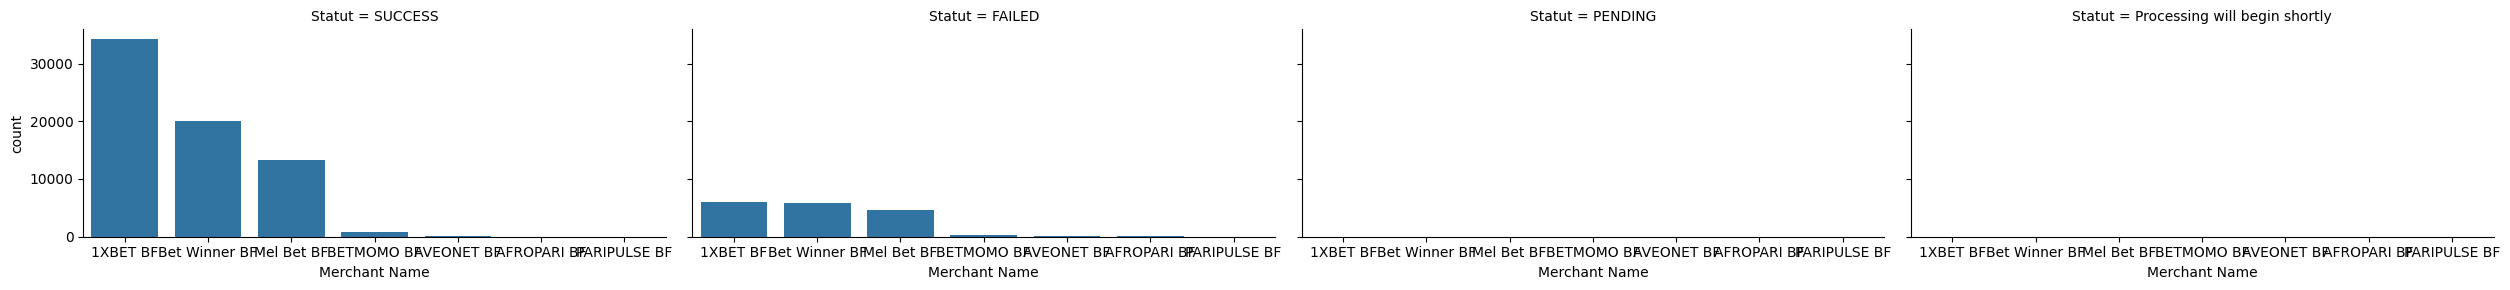

In [54]:
grid=sns.FacetGrid(dfpmt, col='Statut', aspect=2.1)
grid.map(sns.countplot,'Merchant Name')

RECOUVREMENT

In [55]:
recouvrement = ombf.groupby('TRANSFER_DATE')['DEBIT'].sum()
recouvrement.reset_index()

,TRANSFER_DATE,DEBIT
0,28/08/2024,0.00


In [56]:
ombf.groupby('TRANSFER_DATE')['DEBIT'].sum().reset_index().rename(columns={"DEBIT":"Recouvrement"})

,TRANSFER_DATE,Recouvrement
0,28/08/2024,0.00


In [57]:
select_marchand = df_filteredpmt.groupby('Merchant Name').agg(
    Nombre=('Montant', 'count'),
    Volumes=('Montant', 'sum')
)
select_marchand

,Nombre,Volumes
Merchant Name,,
1XBET BF,16199,41122136.00
AFROPARI BF,13,13500.00
AVEONET BF,46,221200.00
BETMOMO BF,443,1904550.00
Bet Winner BF,8836,35407550.00
Mel Bet BF,6921,14351009.00
PARIPULSE BF,2,1100.00
